In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

## 1. Exploratory Data Analysis 

In [3]:
iplot(ff.create_table(data.head()))

In [4]:
iplot(ff.create_table(data.describe()))

In [5]:
# Checking for missing values
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
# Dropping Customer ID
# customerID = data['CustomerID']
# data.drop(['CustomerID'], axis = 'columns', inplace = True)

<AxesSubplot:>

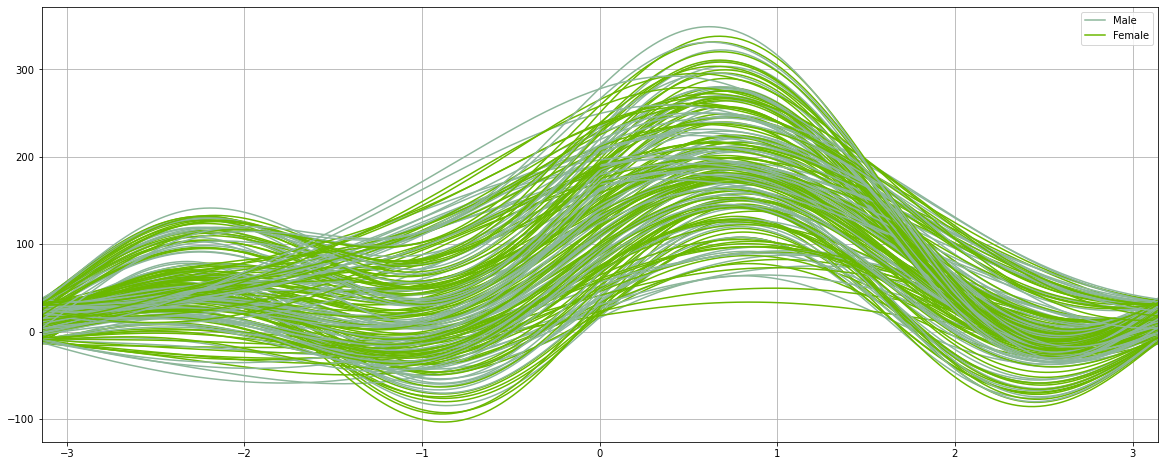

In [7]:
# 1. Gender
plt.rcParams['figure.figsize'] = (20, 8)
pd.plotting.andrews_curves(data, 'Gender')

In [8]:
fig = make_subplots(rows = 1, cols = 2 , specs=[[{"type": "pie"}, {"type": "violin"}]])

gender = data['Gender'].value_counts()
colors = ['lightpink','lightblue']

data1 = go.Pie(
    values = gender.values,
    labels = gender.index,
    hole = 0.4,
    marker = dict(colors = colors))
fig = go.Figure([data1])
fig['layout'].update( title = 'Gender Distribution', width = 500, height = 400)
iplot(fig)

* Female are having more share( 56% ) than Males ( 44% )

In [9]:
# 2. Age
fig = px.histogram(data, x = 'Age', marginal = 'box', color_discrete_sequence = ['lightblue'])
fig['layout'].update(title = ' Gender Distribution ', height = 500, width = 800)
iplot(fig)

#### Most frequent spenders are at age range 30 to 40. Senior Citizens spend very less as well as youngsters

<AxesSubplot:xlabel='Age', ylabel='count'>

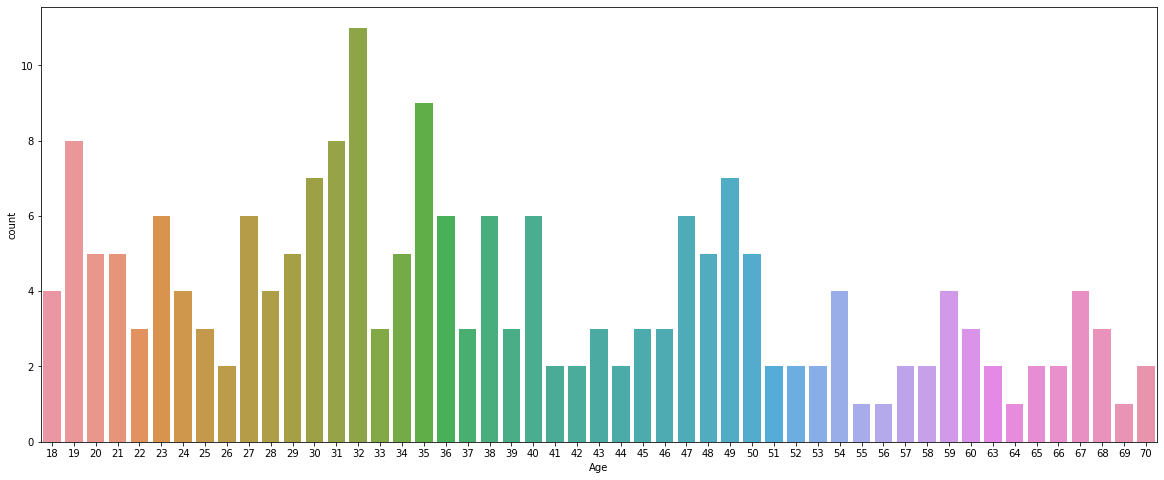

In [10]:
sns.countplot(data['Age'])

#### The maximum spending is between age range 30 to 35, The max spending age is 32 and the least spedning age is 55, 56, 64 & 69


In [11]:
# 3. Annual Income
fig = px.histogram(data, x = 'Annual Income (k$)', marginal = 'box', color_discrete_sequence = ['lightblue'])
fig['layout'].update(title = 'Annual Income (k$)', height = 500, width = 800)
iplot(fig)

#### Most customers are earning between range 60 - 80 US Dollars. Few people are earning about 100 US Dollars

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

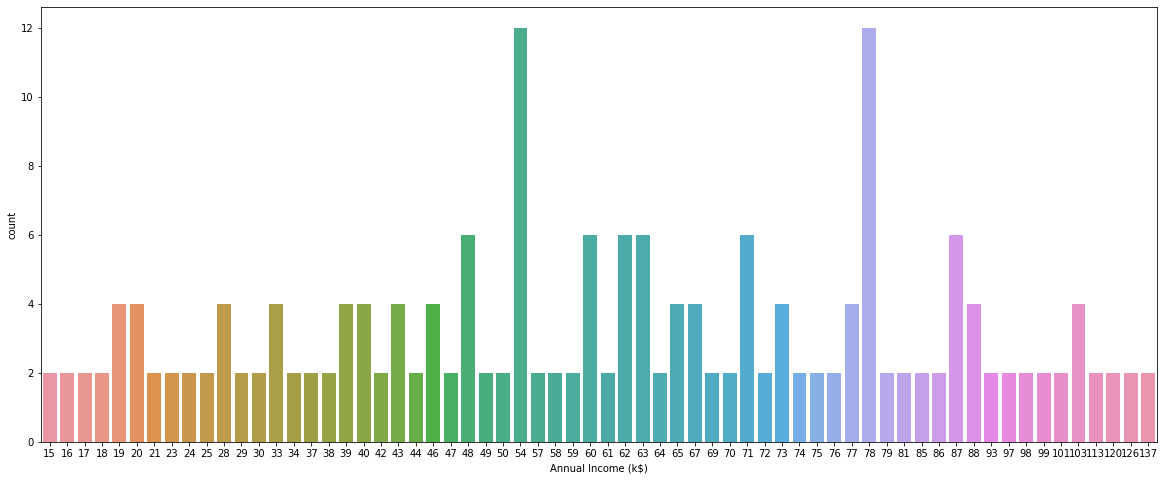

In [12]:
sns.countplot(data['Annual Income (k$)'])

#### The customers who are spending in mall range form Annual income of 15K - 137K US Dollars. The customer earning 54K & 77K US Dollars are most frequent

In [13]:
# 4. Spending Score (1-100)
fig = px.histogram(data, x = 'Spending Score (1-100)', marginal = 'box', color_discrete_sequence = ['lightblue'])
fig['layout'].update(title = 'Spending Score (1-100)', height = 500, width = 800)
iplot(fig)

#### The Spending Score ranges between 40 - 60 Dollars.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

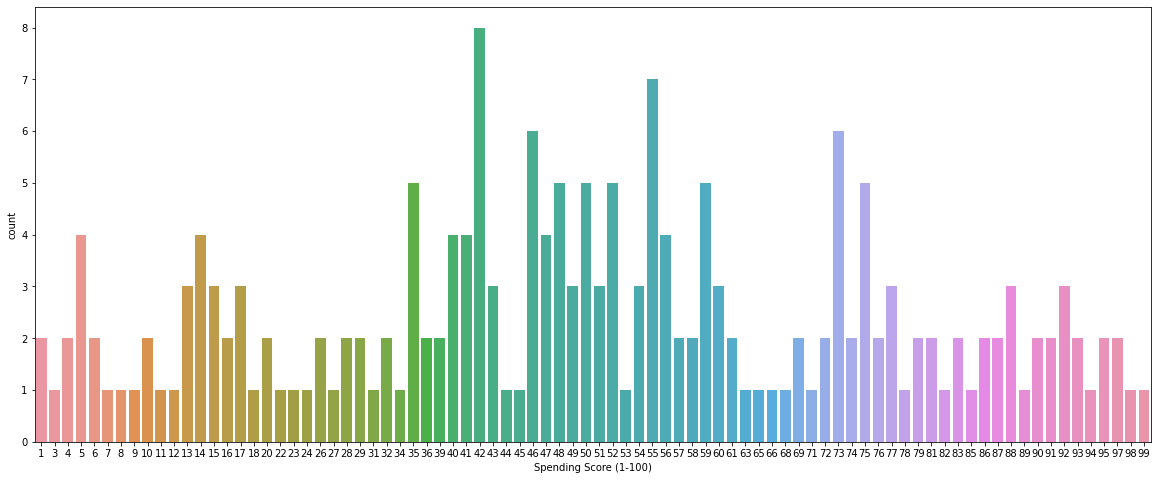

In [14]:
sns.countplot(data['Spending Score (1-100)'])

#### The majority of customers lie between spending score 35 & 60. There are customers who have spening score as 1 as well as 99

###  Bivariate Anaysis

In [15]:
# Gender & Spending 

data1 = go.Violin(
    x = data['Gender'],
    y = data['Spending Score (1-100)'],
    meanline_visible=True,
    box_visible=True,
)
fig = go.Figure([data1])
fig['layout'].update( title = 'Gender & Spending Score Distribution', width = 950, height = 500)
iplot(fig)

* Most males have spending score around 30K to 70K and female have 35K to 75K US Dollars
* Womens are spending more than mens

In [16]:
# Gender & Salary

data1 = go.Violin(
        x = data['Gender'],
        y = data['Annual Income (k$)'],
        meanline_visible = True,
        box_visible = True
)
fig = go.Figure([data1])
fig['layout'].update(title = ' Gender & Salary Distribution ')
iplot(fig)

#### More number of males are getting paid than females, but male & female salary distribution almost similiar

In [17]:
# Gender & Age

data1 = go.Violin(
        x = data['Gender'],
        y = data['Age'],
        meanline_visible = True,
        box_visible = True
)
fig = go.Figure([data1])
fig['layout'].update(title = ' Gender & Age Distribution ')
iplot(fig)

#### Female at age of 30 are spending more than male.  

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

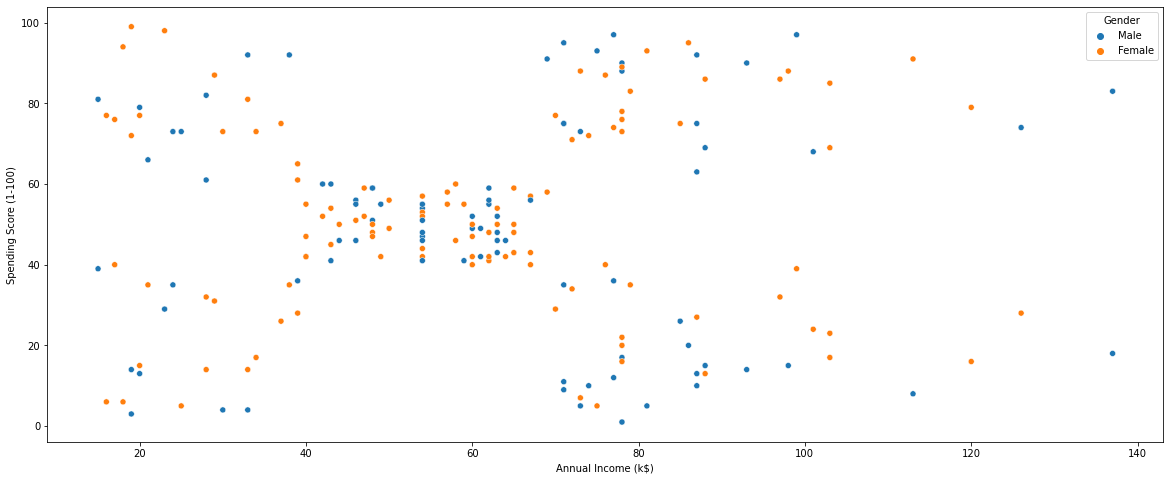

In [18]:
# Spending Score & Salary 
sns.scatterplot(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], hue = data['Gender'])

In [19]:
fig = px.scatter_matrix(data, dimensions = ['Age','Annual Income (k$)','Spending Score (1-100)'], 
                        color = 'Gender', symbol = 'Gender', title = 'Scatter Matrix')
# fig['layout'].update(title = '')
iplot(fig)

<AxesSubplot:>

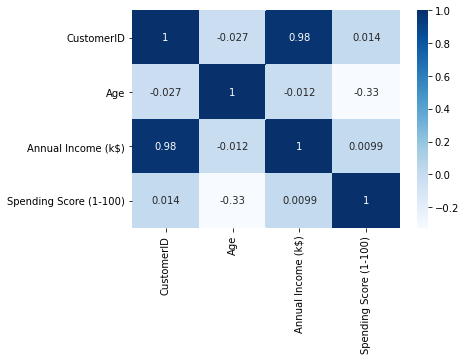

In [20]:
plt.rcParams['figure.figsize'] = (6,4)
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

#### Here we can see features don't have good correlation amoung them, so we chose all of them

In [21]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female':1})

## 2. Model Training

In [22]:
X = data.iloc[:, 2:5]
X.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

### 1. K-Means

In [23]:
# 1. K-Means Clustering

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(go.Scatter(x = [1,2,3,4,5,6,7,8,9,10], y = wcss))
fig['layout'].update(title = ' WCSS Vs Cluster Number ', xaxis_title = 'Cluster', yaxis_title = 'WCSS')
iplot(fig)

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 42)
identified_clusters = kmeans.fit_predict(X)

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(
    data_with_clusters,
    x = 'Age',
    y = 'Annual Income (k$)',
    z = 'Spending Score (1-100)', 
    color = 'Cluster',
    size = 'Age')
iplot(fig)

In [25]:
silhouette_scores = []
n_clusters = [2,3,4,5,6,7,8,9,10]

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
fig = go.Figure(go.Scatter(x = [2,3,4,5,6,7,8,9,10], y = silhouette_scores))
fig['layout'].update(title = ' Silhouette Scores Vs Cluster Number ', xaxis_title = 'Cluster', yaxis_title = 'WCSS')
iplot(fig)

Silhouette score method indicates the best options would be respectively 6 or 5 clusters.

### 2. Hirerchical Clustering

In [26]:
fig = ff.create_dendrogram(X, linkagefun = lambda x: sch.linkage(X, 'ward'))
fig['layout'].update(
    title = 'Hierarchical Clustering', 
    xaxis_title = 'Customers', 
    yaxis_title = 'Euclidean Distance', 
    width = 960, 
    height = 700)
iplot(fig)

In [27]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
identified_clusters = hc.fit_predict(X)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(data_with_clusters, 
                    x = 'Age', 
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)', 
                    color = 'Cluster',
                    size = 'Age')

iplot(fig)

##### Taking a look at the Dendrogram, we see that cutting horizontally the largest vertical line (the second blue from the left), 5 clusters seem to be the best option.

### 3. Affinity propagation

In [28]:
ap = AffinityPropagation(random_state = 0)
idenfied_clusters = ap.fit_predict(X)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(data_with_clusters, 
                    x = 'Age', 
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)', 
                    color = 'Cluster',
                    size = 'Age')
iplot(fig)

## 4. DBSCAN

In [29]:
dbs = DBSCAN(eps = 9, min_samples = 5)
identified_customers = dbs.fit_predict(X)
data_with_customers = data.copy()
data_with_customers['Cluster'] = identified_customers

fig = px.scatter_3d(data_with_clusters, 
                    x = 'Age', 
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)', 
                    color = 'Cluster',
                    size = 'Age')
iplot(fig)

#### We can see that the clusters could be labeled as:

* Low income and low spending score (blue)
* Low income and hig spending score (yellow)
* Mid income and mid spending score (pink): Seems to be the most populated one
* High annual income and low spending score (purple)
* High annual income and high spending score (orange)

As the mall marketing department, we would like to move every observation upward so people spend more money. 
We should focus on the pink and purple clusters as they represent either a whole lot of people or 
high annual income to be spent. We may offer some discounts studying what pople in the pink cluster mostly buy, 
and offer some premium items for people in the purple one.